This program is free software: you can redistribute it and/or modify
it under the terms of the GNU Lesser General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU Lesser General Public License for more details.

You should have received a copy of the GNU Lesser General Public License
along with this program.  If not, see <http://www.gnu.org/licenses/>.

___

- **Author:** Pau Manyer Fuertes
- **Email:** pau.manyer@bsc.es
- **Date:** June 2025
- **Institution:** Barcelona Supercomputing Center (BSC)
- **Department:** Computer Applications in Science and Engineering (CASE)
- **Research Group:** Nuclear Fusion  
___

This jupyter notebook file constitutes the main testing script for FIXED-boundary plasma equilibrium problems solved using the developed module EQUILIPY. EQUILIPY solves using CutFEM the Grad-Shafranov nonlinear elliptic PDE modelling the equilibrium in an axisymmetrical plasma system. 

After selecting the MESH and defining the numerical solver parameters and the different parametric problem items (external magnets, initial plasma domain, initial guess and plasma current model), the file may be executed to launch the solver. EQUILIPY's output can be turned ON and OFF by change the bolean output parameters.

In [ ]:
import sys
sys.path.append('../src/')

from GradShafranovSolver import *

### SELECT MESH FOLDER...
###### LINEAR TRIANGULAR ELEMENT MESH
#MESH = 'TRI03-MEDIUM-ITFW'
#MESH = 'TRI03-INTERMEDIATE-ITFW'
#MESH = 'TRI03-FINE-ITFW'
#MESH = 'TRI03-SUPERFINE-ITFW'
#MESH = 'TRI03-MEGAFINE-ITFW'

###### QUADRATIC TRIANGULAR ELEMENT MESH
#MESH = 'TRI06-MEDIUM-ITFW'
#MESH = 'TRI06-INTERMEDIATE-ITFW'
#MESH = 'TRI06-FINE-ITFW'
#MESH = 'TRI06-SUPERFINE-ITFW'
#MESH = 'TRI06-MEGAFINE-ITFW'

###### CUBIC TRIANGULAR ELEMENT MESH
#MESH = 'TRI10-SUPERFINE-ITFW'

###### LINEAR QUADRILATERAL ELEMENT MESH
#MESH = 'QUA04-MEDIUM-ITFW'
#MESH = 'QUA04-INTERMEDIATE-ITFW'
#MESH = 'QUA04-FINE-ITFW'
#MESH = 'QUA04-SUPERFINE-ITFW'
#MESH = 'QUA04-MEGAFINE-ITFW'

###### QUADRATIC QUADRILATERAL ELEMENT MESH
#MESH = 'QUA09-MEDIUM-ITFW'
#MESH = 'QUA09-INTERMEDIATE-ITFW'
#MESH = 'QUA09-FINE-ITFW'
#MESH = 'QUA09-SUPERFINE-ITFW'
#MESH = 'QUA09-MEGAFINE-ITFW'

#MESH = 'TRI06-SUPERFINE-ITER'
MESH = 'TRI06-MEGAFINE-ITER'


# RECTANGULAR MESH
#MESH = 'TRI03-FINE-RECTANGLE'
#MESH = 'TRI06-MEDIUM-RECTANGLE'

#MESH = 'TRI10-MEGAFINE-LINEAR'

Authorization required, but no authorization protocol specified

Authorization required, but no authorization protocol specified



In [ ]:
##CREATE GRAD-SHAFRANOV PROBLEM WITH CHOSEN MESH
Equilibrium = GradShafranovSolver(MESH)

Working directory: /home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY
READ MESH FILES...
     -> READ MESH DATA FILES...Done!
     -> READ FIX DATA FILE...Done!
Done!


In [ ]:
## DECLARE SWITCHS:
##### GHOST PENALTY STABILISATION
Equilibrium.FIXED_BOUNDARY = False
Equilibrium.GhostStabilization = True
Equilibrium.PARALLEL = False

##### OUTPUT PLOTS IN RUNTIME
Equilibrium.plotelemsClas = False      # OUTPUT SWITCH FOR ELEMENTS CLASSIFICATION PLOTS AT EACH ITERATION
Equilibrium.plotPSI = True             # OUTPUT SWITCH FOR PSI SOLUTION PLOTS AT EACH ITERATION
##### OUTPUT FILES
Equilibrium.out_proparams = True       # OUTPUT SWITCH FOR SIMULATION PARAMETERS 
Equilibrium.out_elemsClas = True       # OUTPUT SWITCH FOR CLASSIFICATION OF MESH ELEMENTS
Equilibrium.out_plasmaLS = True        # OUTPUT SWITCH FOR PLASMA BOUNDARY LEVEL-SET FIELD VALUES
Equilibrium.out_plasmaBC = True        # OUTPUT SWITCH FOR PLASMA BOUNDARY CONDITION VALUES 
Equilibrium.out_plasmaapprox = True    # OUTPUT SWITCH FOR PLASMA BOUNDARY APPROXIMATION DATA 
Equilibrium.out_ghostfaces = True      # OUTPUT SWITCH FOR GHOST STABILISATION FACES DATA 
Equilibrium.out_elemsys = False        # OUTPUT SWITCH FOR ELEMENTAL MATRICES
##### OUTPUT PICKLING
Equilibrium.out_pickle = True          # OUTPUT SWITCH FOR SIMULATION DATA PYTHON PICKLE

In [ ]:
# DEFINE NUMERICAL_TREATMENT PARAMETERS  
Equilibrium.QuadratureOrder2D = 5   # ORDER OF NUMERICAL INTEGRATION QUADRATURES                    
Equilibrium.ext_maxiter = 1            # EXTERNAL LOOP (PHI_B) MAXIMUM ITERATIONS
Equilibrium.ext_tol = 1.0e-3        # EXTERNAL LOOP (PHI_B) CONVERGENCE TOLERANCE
Equilibrium.int_maxiter = 2           # INTERNAL LOOP (PHI_NORM) MAXIMUM ITERATIONS
Equilibrium.int_tol = 1.0e-4        # INTERNAL LOOP (PHI_NORM) CONVERGENCE TOLERANCE
Equilibrium.it_plasma = 0           # ITERATION AFTER WHICH THE PLASMA REGION CAN BE UPDATED
Equilibrium.beta = 1.0e6            # NITSCHE'S METHOD PENALTY PARAMETER
Equilibrium.zeta = 1.0e-2           # GHOST PENALTY PARAMETER
Equilibrium.PSIrelax = False
Equilibrium.lambda0 = 0.3           # INITIAL AIKITEN'S RELAXATION PARAMETER (alpha0 = 1 - lambda0)
Equilibrium.PHIrelax = False
Equilibrium.alphaPHI = 0.5
Equilibrium.R0_axis = 6.0           # MAGNETIC AXIS OPTIMIZATION ROUTINE INITIAL GUESS R COORDINATE
Equilibrium.Z0_axis = 0.0           # MAGNETIC AXIS OPTIMIZATION ROUTINE INITIAL GUESS Z COORDINATE
Equilibrium.R0_saddle = 5.0           # ACTIVE SADDLE POINT OPTIMIZATION ROUTINE INITIAL GUESS R COORDINATE
Equilibrium.Z0_saddle = -3.5          # ACTIVE SADDLE POINT OPTIMIZATION ROUTINE INITIAL GUESS Z COORDINATE
Equilibrium.opti_maxiter = 50         # CRITICAL POINTS OPTIMIZATION ALGORITHM MAXIMAL ITERATIONS NUMBER
Equilibrium.opti_tol = 1.0e-6       # CRITICAL POINTS OPTIMIZATION ALGORITHM SOLUTION TOLERANCE

In [ ]:
##### DEFINE TOKAMAK EXTERNAL MAGNETS
# COILS
coil1 = Coil(index = 1,
             dim = Equilibrium.dim,
             X = np.array([3.9431,7.5741]),
             I = 5.73e6)
coil2 = Coil(index = 2,
             dim = Equilibrium.dim,
             X = np.array([8.2851,6.5398]),
             I = -2.88e6)
coil3 = Coil(index = 3,
             dim = Equilibrium.dim,
             X = np.array([11.9919,3.2752]),
             I = -5.81e6)
coil4 = Coil(index = 4,
             dim = Equilibrium.dim,
             X = np.array([11.9630,-2.2336]),
             I = -4.78e6)
coil5 = Coil(index = 5,
             dim = Equilibrium.dim,
             X = np.array([ 8.3908,-6.7269]),
             I = -7.81e6)
coil6 = Coil(index = 6,
             dim = Equilibrium.dim,
             X = np.array([4.3340, -7.4665]),
             I = 16.94e6)
Equilibrium.COILS = [coil1, coil2, coil3, coil4, coil5, coil6]
   
# SOLENOIDS
solenoid1 = Solenoid(index = 1,
                     dim = Equilibrium.dim,
                     Xe = np.array([[1.696, -5.415],
                                    [1.696, -3.6067]]),
                     I = 5.3e6,
                     Nturns = 1)
solenoid2 = Solenoid(index = 2,
                     dim = Equilibrium.dim,
                     Xe = np.array([[1.696, -3.6067],
                                    [1.696, -1.7983]]),
                     I = -10.3e6,
                     Nturns = 1)
solenoid3 = Solenoid(index = 3,
                     dim = Equilibrium.dim,
                     Xe = np.array([[1.696, -1.7983],
                                    [1.696, 0.0]]),
                     I = -20.8e6,
                     Nturns = 1)
solenoid4 = Solenoid(index = 4,
                     dim = Equilibrium.dim,
                     Xe = np.array([[1.696, 0.0],
                                    [1.696, 1.8183]]),
                     I = -20.8e6,
                     Nturns = 1)
solenoid5 = Solenoid(index = 5,
                     dim = Equilibrium.dim,
                     Xe = np.array([[1.696, 1.8183],
                                    [1.696, 3.6267]]),
                     I = -4.05e6,
                     Nturns = 1)
solenoid6 = Solenoid(index = 6,
                     dim = Equilibrium.dim,
                     Xe = np.array([[1.696, 3.6267],
                                    [1.696, 5.435]]),
                     I = -4.82e6,
                     Nturns = 1)
Equilibrium.SOLENOIDS = [solenoid1, solenoid2, solenoid3, solenoid4, solenoid5, solenoid6]

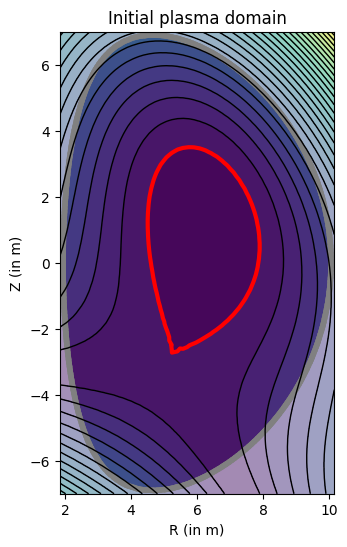

In [ ]:
# DEFINE INITIAL PLASMA BOUNDARY
"""
# PLASMA BOUNDARY PARAMETRISED USING LINEAR SOLUTION 0-LEVEL CONTOUR
Equilibrium.initialPHI = InitialPlasmaBoundary(PROBLEM = Equilibrium,   
                                           GEOMETRY = 'LINEAR', # PREDEFINED MODEL
                                           R0 = 6.0,            # MEAN RADIUS          
                                           epsilon = 0.38,      # INVERSE ASPECT RATIO
                                           kappa = 1.8,         # ELONGATION
                                           delta = 0.34)        # TRIANGULARITY
"""

"""
# PLASMA BOUNDARY PARAMETRISED USING ZHENG SOLUTION 0-LEVEL CONTOUR
Equilibrium.initialPHI = InitialPlasmaBoundary(PROBLEM = Equilibrium,
                                           GEOMETRY = 'ZHENG', # PREDEFINED MODEL
                                           R0 = 6.0,           # MEAN RADIUS          
                                           epsilon = 0.32,     # INVERSE ASPECT RATIO
                                           kappa = 1.7,        # ELONGATION
                                           delta = 0.33)       # TRIANGULARITY
"""

"""
X_SADDLE = np.array([5.5, -2.3])        # ACTIVE SADDLE POINT        
X_RIGHT = np.array([7.2, 0.6])          # POINT ON RIGHT
X_LEFT = np.array([4.8, 1.0])           # POINT ON LEFT
X_TOP = np.array([5.9, 2.8])            # POINT ON TOP
"""

X_SADDLE = np.array([5.3, -2.7])
X_RIGHT = np.array([7.9, 0.5])
X_LEFT = np.array([4.5, 1.2])
X_TOP = np.array([5.9, 3.5])

# PLASMA BOUNDARY PARAMETRISED F4E HAMILTONIAN 0-LEVEL CONTOUR
Equilibrium.initialPHI = InitialPlasmaBoundary(PROBLEM = Equilibrium,
                                           GEOMETRY = 'F4E',
                                           Xsaddle = X_SADDLE,  # ACTIVE SADDLE POINT        
                                           Xright = X_RIGHT,    # POINT ON RIGHT
                                           Xleft = X_LEFT,      # POINT ON LEFT
                                           Xtop = X_TOP)        # POINT ON TOP

"""
def PHI0(X):
    return
Equilibrium.initialPHI = InitialPlasmaBoundary(PROBLEM = Equilibrium,
                                           GEOMETRY = 'OTHER',
                                           PHI0 = PHI0)
"""

Equilibrium.initialPHI.Plot()

In [ ]:
Equilibrium.InitialiseMESH()

PREPROCESS MESH AND INITIALISE MESH ITEMS...
     -> INITIALISE SIMULATION PARAMETERS...Done!
     -> INITIALISE LEVEL-SET...Done!
     -> INITIALISE ELEMENTS...
         · MESH ELEMENTS MEAN AREA = 0.004398826816069766 m^2
         · MESH ELEMENTS MEAN LENGTH = 0.1005993443142157 m
         · RECOMMENDED NITSCHE'S PENALTY PARAMETER VALUE    beta ~ C·39.761690568342594
     Done!
     -> CLASSIFY ELEMENTS...Done!
     -> APPROXIMATE PLASMA BOUNDARY INTERFACE...Done!
     -> IDENTIFY GHOST FACES...Done!
     -> COMPUTE NUMERICAL INTEGRATION QUADRATURES...Done!
Done!


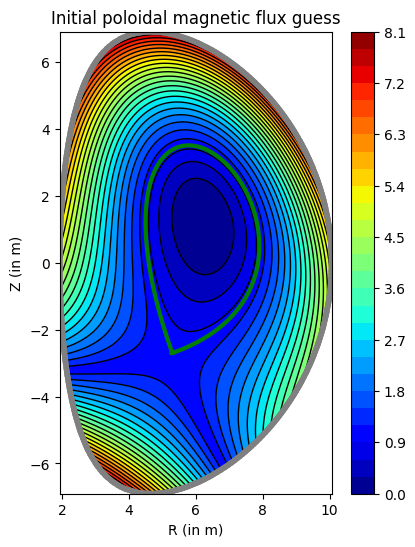

In [ ]:
# DEFINE INITIAL GUESS FOR PLASMA MAGNETIC FLUX
"""
Equilibrium.initialPSI = InitialGuess(PROBLEM = Equilibrium,
                                  PSI_GUESS = 'LINEAR', # PREDEFINED MODEL 
                                  R0 = 6.0,             # MEAN RADIUS          
                                  epsilon = 0.32,       # INVERSE ASPECT RATIO
                                  kappa = 1.7,          # ELONGATION
                                  delta = 0.33)         # TRIANGULARITY
"""                                  

"""
Equilibrium.initialPSI = InitialGuess(PROBLEM = Equilibrium,
                                  PSI_GUESS = 'LINEAR', # PREDEFINED MODEL 
                                  R0 = 6.0,             # MEAN RADIUS          
                                  epsilon = 0.32,       # INVERSE ASPECT RATIO
                                  kappa = 1.7,          # ELONGATION
                                  delta = 0.33)         # TRIANGULARITY
"""                             
                                 
"""
Equilibrium.initialPSI = InitialGuess(PROBLEM = Equilibrium,
                                  PSI_GUESS = 'ZHENG',  # PREDEFINED MODEL
                                  NOISE = True,         # WHITE NOISE 
                                  R0 = 6.0,             # MEAN RADIUS          
                                  epsilon = 0.32,       # INVERSE ASPECT RATIO
                                  kappa = 1.7,          # ELONGATION
                                  delta = 0.33,         # TRIANGULARITY
                                  A = 2.0)              # NOISE AMPLITUDE
"""

"""
Equilibrium.initialPSI = InitialGuess(PROBLEM = Equilibrium,
                                  PSI_GUESS = 'NONLINEAR',  # PREDEFINED MODEL
                                  NOISE = True,             # WHITE NOISE 
                                  R0 = 6.0,                 # MEAN RADIUS
                                  A = 2.0)                  # NOISE AMPLITUDE         
"""   

"""
X_SADDLE = np.array([5.5, -2.3])        # ACTIVE SADDLE POINT        
X_RIGHT = np.array([7.2, 0.6])          # POINT ON RIGHT
X_LEFT = np.array([4.8, 1.0])           # POINT ON LEFT
X_TOP = np.array([5.9, 2.8])            # POINT ON TOP
"""

X_SADDLE = np.array([5.3, -2.7])
X_RIGHT = np.array([7.9, 0.5])
X_LEFT = np.array([4.5, 1.2])
X_TOP = np.array([5.9, 3.5])

X0 = list()
X0.append(np.array([6.0,0.0],dtype=float))
Equilibrium.initialPSI = InitialGuess(PROBLEM = Equilibrium,
                                  PSI_GUESS = 'F4E',
                                  NORMALISE = True,
                                  Xsaddle = X_SADDLE,  # ACTIVE SADDLE POINT        
                                  Xright = X_RIGHT,    # POINT ON RIGHT
                                  Xleft = X_LEFT,      # POINT ON LEFT
                                  Xtop = X_TOP,        # POINT ON TOP
                                  X0 = X0)     

"""
def PSI0(X):
    return
Equilibrium.initialPSI = InitialGuess(PROBLEM = Equilibrium,
                                  PSI_GUESS = 'OTHER',
                                  PSI0 = PSI0)
"""

Equilibrium.initialPSI.Plot()

In [ ]:
Equilibrium.InitialisePSI()

     -> INITIALISE PSI ARRAYS...Done!
     -> COMPUTE INITIAL GUESS FOR PSI_NORM...Done!


In [ ]:
### DEFINE PLASMA CURRENT MODEL

# LINEAR MODEL
"""
Equilibrium.PlasmaCurrent = CurrentModel(PROBLEM = Equilibrium,
                                     MODEL = 'LINEAR',  # PREDEFINED MODEL
                                     R0 = 6.0,          # MEAN RADIUS          
                                     epsilon = 0.32,    # INVERSE ASPECT RATIO
                                     kappa = 1.7,       # ELONGATION
                                     delta = 0.33)      # TRIANGULARITY
"""

"""
# ZHENG MODEL
Equilibrium.PlasmaCurrent = CurrentModel(PROBLEM = Equilibrium,
                                     MODEL = 'ZHENG',   # PREDEFINED MODEL
                                     R0 = 6.0,          # MEAN RADIUS
                                     epsilon = 0.32,    # INVERSE ASPECT RATIO
                                     kappa = 1.7,       # ELONGATION
                                     delta = 0.33)      # TRIANGULARITY
"""

"""
# NONLINEAR MODEL
Equilibrium.PlasmaCurrent = CurrentModel(PROBLEM = Equilibrium,
                                     MODEL = 'NONLINEAR', # PREDEFINED MODEL
                                     R0 = 6.0)            # MEAN RADIUS
"""


# COMPUTE PRESSURE PROFILE FACTOR
R0 = 6.0        # MEAN RADIUS
kappa = 1.7     # ELONGATION
B0 = 9.0        # MAGNETIC FIELD MAGNITUDE ON MAGNETIC AXIS
q0 = 0.7        # TOKAMAK SAFETY FACTOR

P0=B0*((kappa**2)+1)/(Equilibrium.mu0*(R0**2)*q0*kappa)

"""
Equilibrium.PlasmaCurrent = CurrentModel(PROBLEM = Equilibrium,
                                     MODEL = 'JARDIN',
                                     P0 = P0,           # PLASMA PRESSURE ON MAGNETIC AXIS
                                     np = 2.0,          # 
                                     G0 = -34.4,        # TOROIDAL FUNCTION VALUE ON MAGNETIC AXIS
                                     ng = 2.0,          #
                                     Tcurrent = -15e6)  # TOTAL PLASMA CURRENT
"""

"""
Equilibrium.PlasmaCurrent = CurrentModel(PROBLEM = Equilibrium,
                                     MODEL = 'PCONSTRAIN',
                                     P0 = P0,           # PLASMA PRESSURE ON MAGNETIC AXIS
                                     alpha_m = 1,       # 
                                     alpha_n = 2,       #
                                     Tcurrent = 15e6)  # TOTAL PLASMA CURRENT
"""

Equilibrium.PlasmaCurrent = CurrentModel(PROBLEM = Equilibrium,
                                     MODEL = 'APEC',
                                     Ii = 0.81,         # PLASMA INTERNAL INDUCTANCE
                                     Betap = 0.75,      # POLOIDAL BETA
                                     R0 = 6.0,          # MEAN RADIUS
                                     Tcurrent = 15e6)   # TOTAL PLASMA CURRENT


"""
# USER DEFINED MODEL
def Jphi(X,PSI):
    return 6*X[0]
Equilibrium.PlasmaCurrent = CurrentModel(PROBLEM = Equilibrium,
                                     MODEL = 'OTHER',
                                     Jphi = Jphi,
                                     PSIdependent = False)
"""

"\n# USER DEFINED MODEL\ndef Jphi(X,PSI):\n    return 6*X[0]\nProblem.PlasmaCurrent = CurrentModel(PROBLEM = Problem,\n                                     MODEL = 'OTHER',\n                                     Jphi = Jphi,\n                                     PSIdependent = False)\n"

In [ ]:
Equilibrium.IntegratePlasmaDomain(Equilibrium.PlasmaCurrent.Jphi)

15000000.000000073

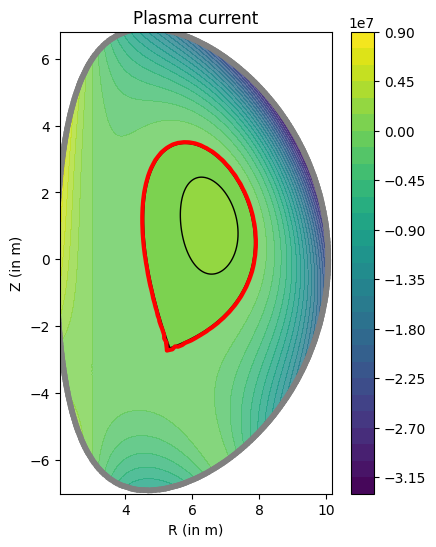

In [ ]:
Equilibrium.PlasmaCurrent.Plot()

PREPARE OUTPUT DIRECTORY...Done!
INITIALISE SIMULATION ARRAYS ...
     -> COMPUTE INITIAL VACUUM VESSEL BOUNDARY VALUES PSI_B...

/home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY/TESTs/../src/Magnet.py:182: RuntimeWarning: invalid value encountered in scalar divide
  dr = (self.Xe[1,0]-self.Xe[0,0])/(self.Nturns-1)
/home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY/TESTs/../src/Magnet.py:183: RuntimeWarning: divide by zero encountered in scalar divide
  dz = (self.Xe[1,1]-self.Xe[0,1])/(self.Nturns-1)


Done!
     -> ASSIGN INITIAL BOUNDARY VALUES...Done!
Done!


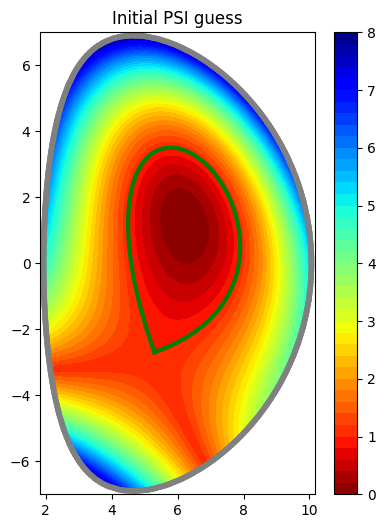

START ITERATION...
OUTER ITERATION = 1 , INNER ITERATION = 1
     Total current =  15000000.000000073
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.41352336, 0.81095838]), -10.918447405910769, 10281)]
Xpoint =  [(array([ 5.00394362, -3.07884614]), 0.5901303057787435, 19848)]
LOCAL EXTREMUM AT  [6.41352336 0.81095838]  (ELEMENT  10281 ) WITH VALUE PSI_0 =  -10.918447405910769
SADDLE POINT AT  [ 5.00394362 -3.07884614]  (ELEMENT  19848 ) WITH VALUE PSI_X =  0.5901303057787435


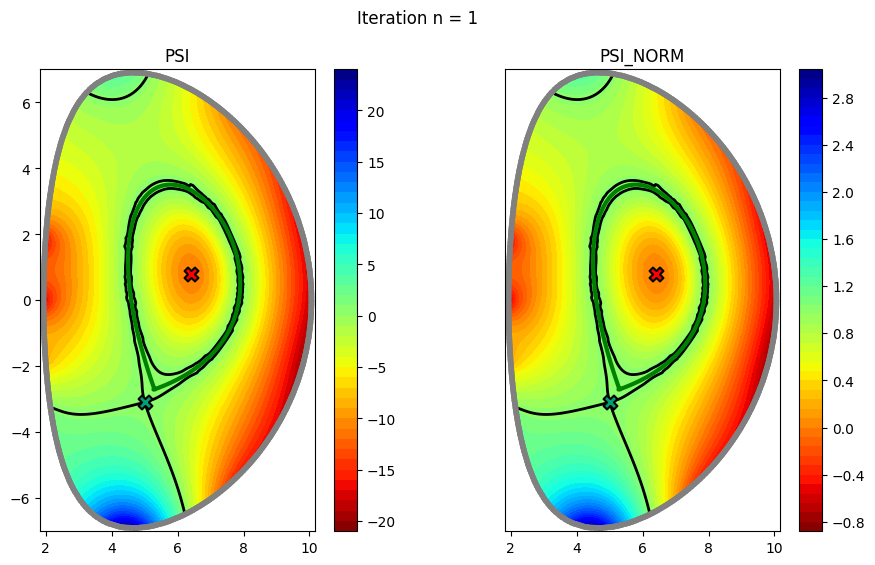

Internal iteration =  1 , PSI_NORM residu =  3.487087759553474
 
OUTER ITERATION = 1 , INNER ITERATION = 2
     Total current =  14999999.999999886
     Integrate over non-cut elements...Done!
     Integrate over cut-elements subelements...Done!
     Integrate along cut-elements interface edges...Done!
     Integrate ghost penalty term along cut elements internal ghost faces...Done!
Done!
Opoint =  [(array([6.42517019, 0.81112805]), -12.314231458366908, 10281)]
Xpoint =  []
LOCAL EXTREMUM AT  [6.42517019 0.81112805]  (ELEMENT  10281 ) WITH VALUE PSI_0 =  -12.314231458366908
SADDLE POINT NOT FOUND, TAKING PREVIOUS SOLUTION
SADDLE POINT AT  [ 5.00394362 -3.07884614]  (ELEMENT  19848 ) WITH VALUE PSI_X =  0.5901303057787435


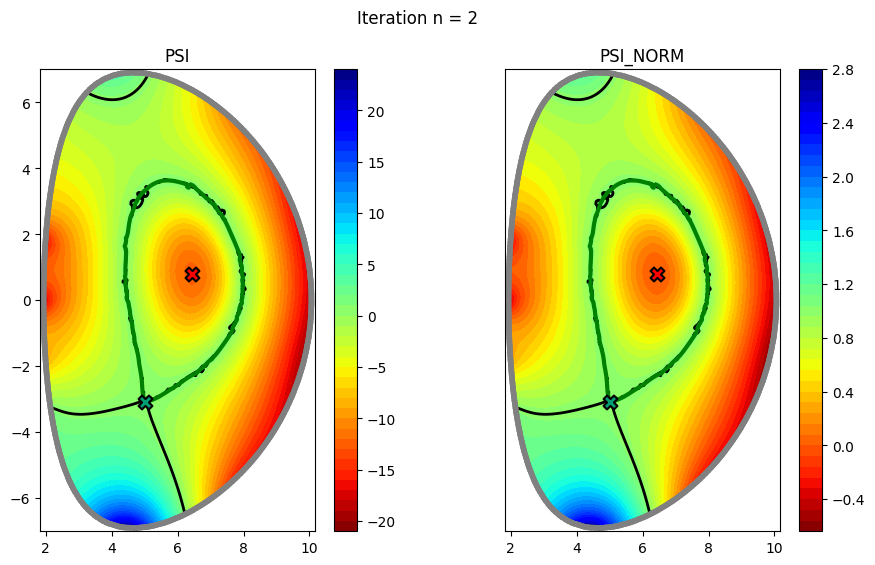

Internal iteration =  2 , PSI_NORM residu =  0.0956457902141817
 
COMPUTE VACUUM VESSEL FIRST WALL VALUES PSI_B...

/home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY/TESTs/../src/Magnet.py:182: RuntimeWarning: invalid value encountered in scalar divide
  dr = (self.Xe[1,0]-self.Xe[0,0])/(self.Nturns-1)
/home/elmanyer/Documents/BSC/EQUILI/EQUILIPY/EQUILIPY_paper/EQUILIPY/TESTs/../src/Magnet.py:183: RuntimeWarning: divide by zero encountered in scalar divide
  dz = (self.Xe[1,1]-self.Xe[0,1])/(self.Nturns-1)


Done!
External iteration =  1 , PSI_B residu =  0.023205719780173165
 
SOLUTION CONVERGED


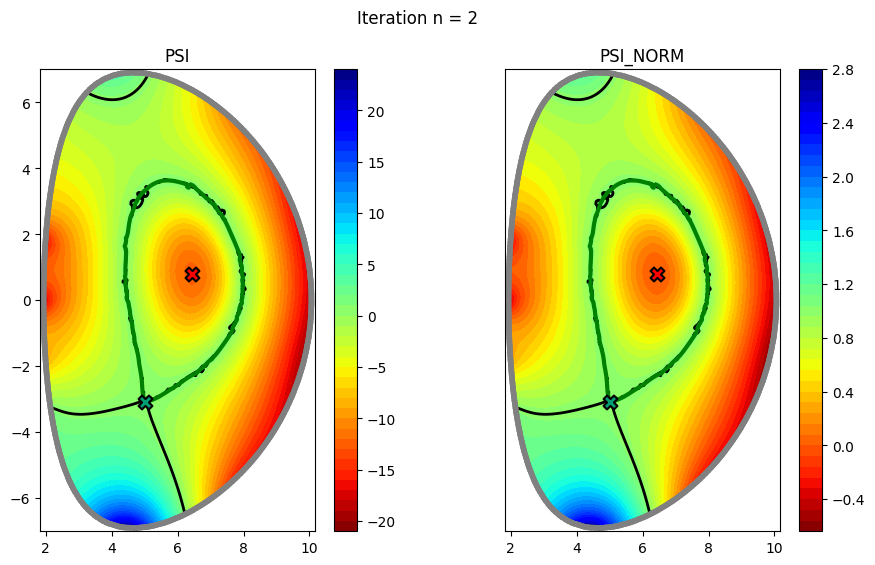

In [ ]:
## NAME SIMULATION CASE 
CASE = 'TS-FREE-APEC-ITFW'

## COMPUTE PLASMA EQUILIBRIUM
Equilibrium.EQUILI(CASE)

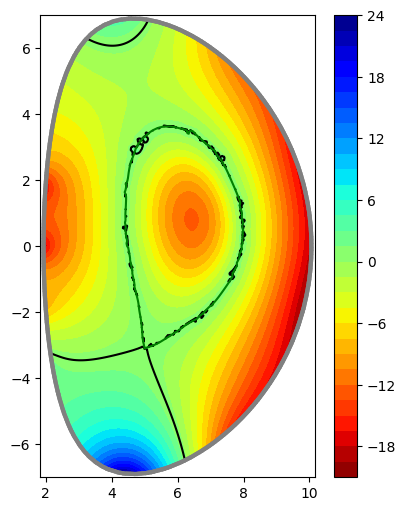

In [ ]:
Equilibrium.PlotPSI()

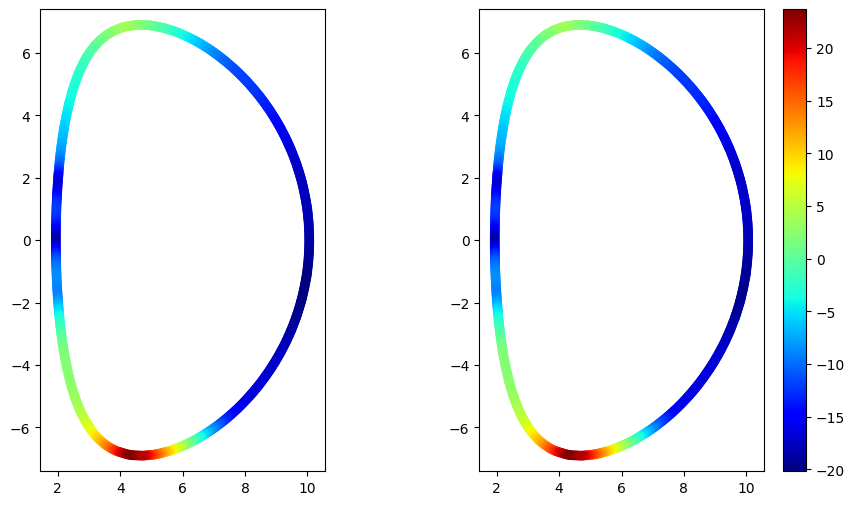

In [ ]:
self = Equilibrium

cmap = plt.get_cmap('jet')

norm = plt.Normalize(np.min([self.PSI_B_sim[0].min(),self.PSI_B_sim[1].min()]),np.max([self.PSI_B_sim[0].max(),self.PSI_B_sim[1].max()]))

fig, axs = plt.subplots(1, 2, figsize=(11,6))
axs[0].set_aspect('equal')
axs[0].set_ylim(self.Zmin-0.5,self.Zmax+0.5)
axs[0].set_xlim(self.Rmin-0.5,self.Rmax+0.5)

linecolors0 = cmap(norm(self.PSI_B_sim[0]))
axs[0].scatter(self.X[self.BoundaryNodes,0],self.X[self.BoundaryNodes,1],color = linecolors0)

axs[1].set_aspect('equal')
axs[1].set_ylim(self.Zmin-0.5,self.Zmax+0.5)
axs[1].set_xlim(self.Rmin-0.5,self.Rmax+0.5)

linecolors1 = cmap(norm(self.PSI_B_sim[1]))
axs[1].scatter(self.X[self.BoundaryNodes,0],self.X[self.BoundaryNodes,1],color = linecolors1)

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),ax=axs[1])


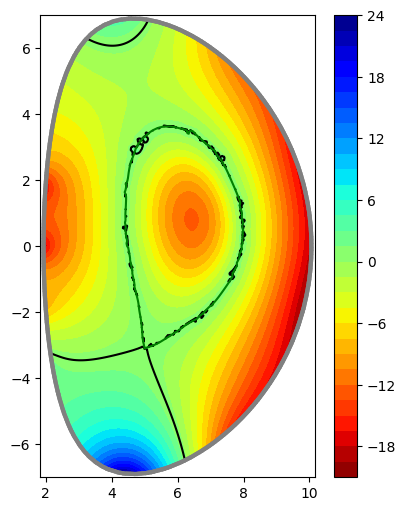

In [ ]:
Equilibrium.PlotPSI()

In [ ]:
self = Equilibrium

np.linalg.norm(np.array(self.PSI_B_sim[0])-np.array(self.PSI_B_sim[1]))/np.linalg.norm(np.array(self.PSI_B_sim[1]))

0.023205719780173165

In [18]:
PlasmaIt_sim = np.zeros(len(self.PSIIt_sim), dtype=int)
plasupit = 0
for it in range(len(self.PSIIt_sim)):
    PlasmaIt_sim[it] = plasupit - 1 if it else 0  # First element is 0, others follow pbit-1
    
    if plasupit < len(self.PlasmaUpdateIt_sim) and it == self.PlasmaUpdateIt_sim[plasupit]:
        plasupit += 1
        if plasupit == len(self.PlasmaUpdateIt_sim):  # If last update point, assign remaining values
            PlasmaIt_sim[it+1:] = plasupit - 1
            break 

it = 3       

PSI = self.PSI_sim[it][:,0]
Xcrit = self.PSIcrit_sim[it-1]
PlasmaLS = self.PlasmaLS_sim[PlasmaIt_sim[it]]

fig, ax = plt.subplots(1, 1, figsize=(5,6))
ax.set_aspect('equal')
ax.set_xlim(self.Rmin-self.dzoom,self.Rmax+self.dzoom)
ax.set_ylim(self.Zmin-self.dzoom,self.Zmax+self.dzoom)
contourf = ax.tricontourf(self.X[:,0],self.X[:,1], PSI, levels=30, cmap = self.plasmacmap)
contour1 = ax.tricontour(self.X[:,0],self.X[:,1], PSI, levels=[Xcrit[1,3]], colors = 'black')
contour2 = ax.tricontour(self.X[:,0],self.X[:,1], PlasmaLS, levels=[0], colors = self.plasmabouncolor)

# MAGNETIC AXIS
ax.scatter(Xcrit[0,0],Xcrit[0,1],marker = 'X',facecolor=self.magneticaxiscolor, edgecolor='k', s = 100, linewidths = 1.5,zorder=5)
# SADDLE POINT
ax.scatter(Xcrit[1,0],Xcrit[1,1],marker = 'X',facecolor=self.saddlepointcolor, edgecolor='k', s = 100, linewidths = 1.5,zorder=5)

# Mask solution outside computational domain's boundary 
compboundary = np.zeros([len(self.BoundaryVertices)+1,2])
compboundary[:-1,:] = self.X[self.BoundaryVertices,:]
# Close path
compboundary[-1,:] = compboundary[0,:]
clip_path = Path(compboundary)
patch = PathPatch(clip_path, transform=ax.transData)
for cont in [contourf,contour1,contour2]:
    for coll in cont.collections:
        coll.set_clip_path(patch)
# Plot computational domain's boundary
for iboun in range(self.Nbound):
    ax.plot(self.X[self.Tbound[iboun,:2],0],self.X[self.Tbound[iboun,:2],1],linewidth = 3, color = 'grey')
        
plt.colorbar(contourf, ax=ax)
plt.show()

IndexError: list index out of range

In [ ]:
Xcrit[1,3]

0.6260075830930396

In [ ]:
# SMOOTH FIELD VALUES AROUND INTERFACE 
from scipy.interpolate import SmoothBivariateSpline

spline = SmoothBivariateSpline(self.X[:, 0], self.X[:, 1], PSI, kx=5, ky=5)

PSI_smooth = PSI.copy()

for ielem in self.PlasmaBoundElems:
    ELEM = self.Elements[ielem]
    PSI_smooth[ELEM.Te] = spline(ELEM.Xe[:, 0], ELEM.Xe[:, 1], grid=False)


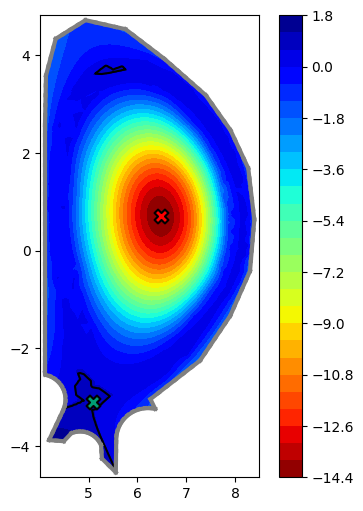

In [ ]:
# Plot
fig, ax = plt.subplots(1, 1, figsize=(5,6))
ax.set_aspect('equal')
ax.set_xlim(self.Rmin-self.dzoom,self.Rmax+self.dzoom)
ax.set_ylim(self.Zmin-self.dzoom,self.Zmax+self.dzoom)

contourf = ax.tricontourf(self.X[:, 0], self.X[:, 1], PSI_smooth, levels=30, cmap = self.plasmacmap)
contour1 = ax.tricontour(self.X[:, 0], self.X[:, 1], PSI_smooth, levels=[Xcrit[1,3]], colors = 'black')
#contour2 = ax.tricontour(self.X[:,0],self.X[:,1], PlasmaLS, levels=[0], colors = self.plasmabouncolor)

# MAGNETIC AXIS
ax.scatter(Xcrit[0,0],Xcrit[0,1],marker = 'X',facecolor=self.magneticaxiscolor, edgecolor='k', s = 100, linewidths = 1.5,zorder=5)
# SADDLE POINT
ax.scatter(Xcrit[1,0],Xcrit[1,1],marker = 'X',facecolor=self.saddlepointcolor, edgecolor='k', s = 100, linewidths = 1.5,zorder=5)

# Mask solution outside computational domain's boundary 
compboundary = np.zeros([len(self.BoundaryVertices)+1,2])
compboundary[:-1,:] = self.X[self.BoundaryVertices,:]
# Close path
compboundary[-1,:] = compboundary[0,:]
clip_path = Path(compboundary)
patch = PathPatch(clip_path, transform=ax.transData)
for cont in [contourf,contour1,contour2]:
    for coll in cont.collections:
        coll.set_clip_path(patch)     
        
# Plot computational domain's boundary
for iboun in range(self.Nbound):
    ax.plot(self.X[self.Tbound[iboun,:2],0],self.X[self.Tbound[iboun,:2],1],linewidth = 3, color = 'grey')
        
plt.colorbar(contourf, ax=ax)
plt.show()

In [ ]:
# COMPUTE CRITICAL VALUES
X0 = list()
X0.append(np.array([self.R0_axis,self.Z0_axis],dtype=float))
#X0.append(np.array([self.R0_saddle,self.Z0_saddle],dtype=float))
X0.append(np.array([5,-3],dtype=float))

Opoint, Xpoint = self.FindCritical(PSI_smooth,X0)

In [ ]:
print(Opoint,Xpoint)

psiaxis = Opoint[0][1]
if not Xpoint:
    psiboun = Xcrit[1,3]
    
PSI_smooth_NORM = (PSI_smooth-psiaxis)/(psiboun-psiaxis)

[(array([6.47832018, 0.70470356]), -14.387526957829856, 1099)] [(array([ 5.01749859, -2.98622242]), 0.7169882576435171, 300)]


NameError: name 'psiboun' is not defined

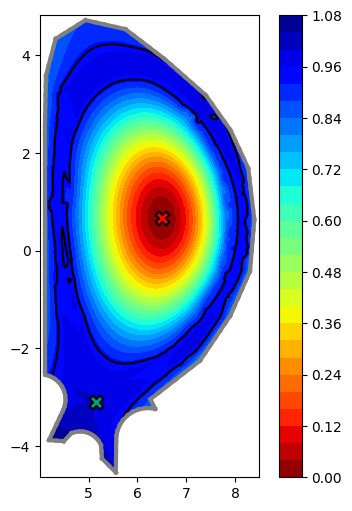

In [ ]:
# Plot
fig, ax = plt.subplots(1, 1, figsize=(5,6))
ax.set_aspect('equal')
ax.set_xlim(self.Rmin-self.dzoom,self.Rmax+self.dzoom)
ax.set_ylim(self.Zmin-self.dzoom,self.Zmax+self.dzoom)

#contourf = ax.tricontourf(self.X[:, 0], self.X[:, 1], PSI_smooth, levels=30, cmap = self.plasmacmap)
#contour1 = ax.tricontour(self.X[:, 0], self.X[:, 1], PSI_smooth, levels=[Xcrit[1,3]-0.75], colors = 'black')
#contour2 = ax.tricontour(self.X[:,0],self.X[:,1], PlasmaLS, levels=[0], colors = self.plasmabouncolor)

contourf = ax.tricontourf(self.X[:, 0], self.X[:, 1], PSI_smooth_NORM, levels=30, cmap = self.plasmacmap)
contour1 = ax.tricontour(self.X[:, 0], self.X[:, 1], PSI_smooth_NORM, levels=[0.93], colors = 'black')

# MAGNETIC AXIS
ax.scatter(Xcrit[0,0],Xcrit[0,1],marker = 'X',facecolor=self.magneticaxiscolor, edgecolor='k', s = 100, linewidths = 1.5,zorder=5)
# SADDLE POINT
ax.scatter(Xcrit[1,0],Xcrit[1,1],marker = 'X',facecolor=self.saddlepointcolor, edgecolor='k', s = 100, linewidths = 1.5,zorder=5)

# Mask solution outside computational domain's boundary 
compboundary = np.zeros([len(self.BoundaryVertices)+1,2])
compboundary[:-1,:] = self.X[self.BoundaryVertices,:]
# Close path
compboundary[-1,:] = compboundary[0,:]
clip_path = Path(compboundary)
patch = PathPatch(clip_path, transform=ax.transData)
for cont in [contourf,contour1,contour2]:
    for coll in cont.collections:
        coll.set_clip_path(patch)     
        
# Plot computational domain's boundary
for iboun in range(self.Nbound):
    ax.plot(self.X[self.Tbound[iboun,:2],0],self.X[self.Tbound[iboun,:2],1],linewidth = 3, color = 'grey')
        
plt.colorbar(contourf, ax=ax)
plt.show()

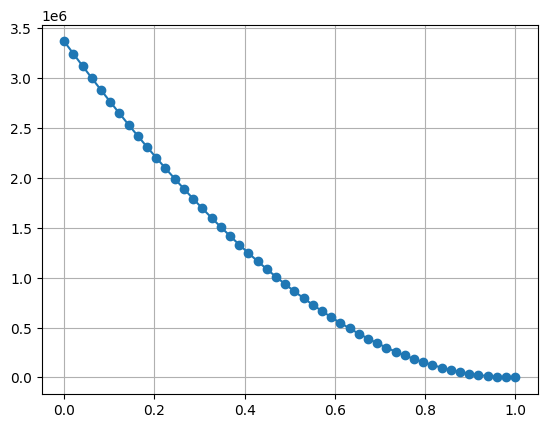

In [ ]:
import numpy as np
from scipy.integrate import quad

self = Equilibrium

def P(psinorm):
    shapeintegral, _ = quad(
        func = lambda x: (1.0 - x**self.PlasmaCurrent.alpha),
        a = psinorm, 
        b = 1.0)
    return self.PlasmaCurrent.L*self.PlasmaCurrent.Beta*(self.PSI_X - self.PSI_0)*shapeintegral / self.PlasmaCurrent.R0

n = 50
psi_norm = np.linspace(0,1,n)
Pprofile = np.zeros([n])
for i, psi in enumerate(psi_norm):
    Pprofile[i] = P(psi)
    
plt.plot(psi_norm,Pprofile,'-o')
plt.grid()

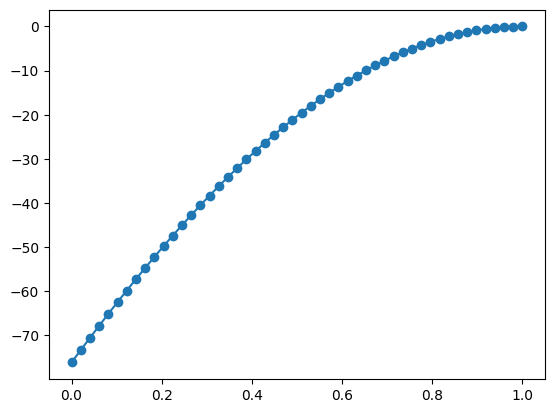

In [30]:
def F(psinorm):
    shapeintegral, _ = quad(
        func = lambda x: (1.0 - x**self.PlasmaCurrent.alpha),
        a = psinorm, 
        b = 1.0)
    return 2*self.mu0*self.PlasmaCurrent.L*(1-self.PlasmaCurrent.Beta)*(self.PSI_X - self.PSI_0)*self.PlasmaCurrent.R0*shapeintegral

Fprofile = np.zeros([n])
for i, psi in enumerate(psi_norm):
    Fprofile[i] = F(psi)
    
plt.plot(psi_norm,Fprofile,'-o')
